In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Upload file CSV
from google.colab import files
uploaded = files.upload()

Saving stock.csv to stock (1).csv


In [ ]:
# Load the CSV file
import io
file_name = next(iter(uploaded))  # Get the file name
stock_data = pd.read_csv(io.BytesIO(uploaded[file_name]), delimiter=';')

# Strip whitespace from headers
stock_data.columns = stock_data.columns.str.strip()

# Strip whitespace from all string entries and remove extra spaces within numbers
for col in stock_data.columns:
    if stock_data[col].dtype == 'object':
        stock_data[col] = stock_data[col].str.strip()
        stock_data[col] = stock_data[col].str.replace(r'\s+', '', regex=True)

# Define a function to clean the numerical data
def clean_numeric_data(column):
    return column.str.replace('$', '').str.replace(',', '').str.replace(',,', '.').astype(float)

# Convert numerical columns to appropriate data types
stock_data['shares'] = stock_data['shares'].astype(int)
stock_data['Purchase Price'] = clean_numeric_data(stock_data['Purchase Price'])
stock_data['Cost Basis'] = clean_numeric_data(stock_data['Cost Basis'])
stock_data['Curent price'] = clean_numeric_data(stock_data['Curent price'])
stock_data['Market Value'] = clean_numeric_data(stock_data['Market Value'])
stock_data['Gain/Loss'] = clean_numeric_data(stock_data['Gain/Loss'])
stock_data['Dividend/share'] = clean_numeric_data(stock_data['Dividend/share'])
stock_data['Annual Yield'] = stock_data['Annual Yield'].str.replace('%', '').astype(float)


# a. Distribusi data pada setiap atribut Purchase Price, Current Price, dan Gain/Loss dengan grafik histogram



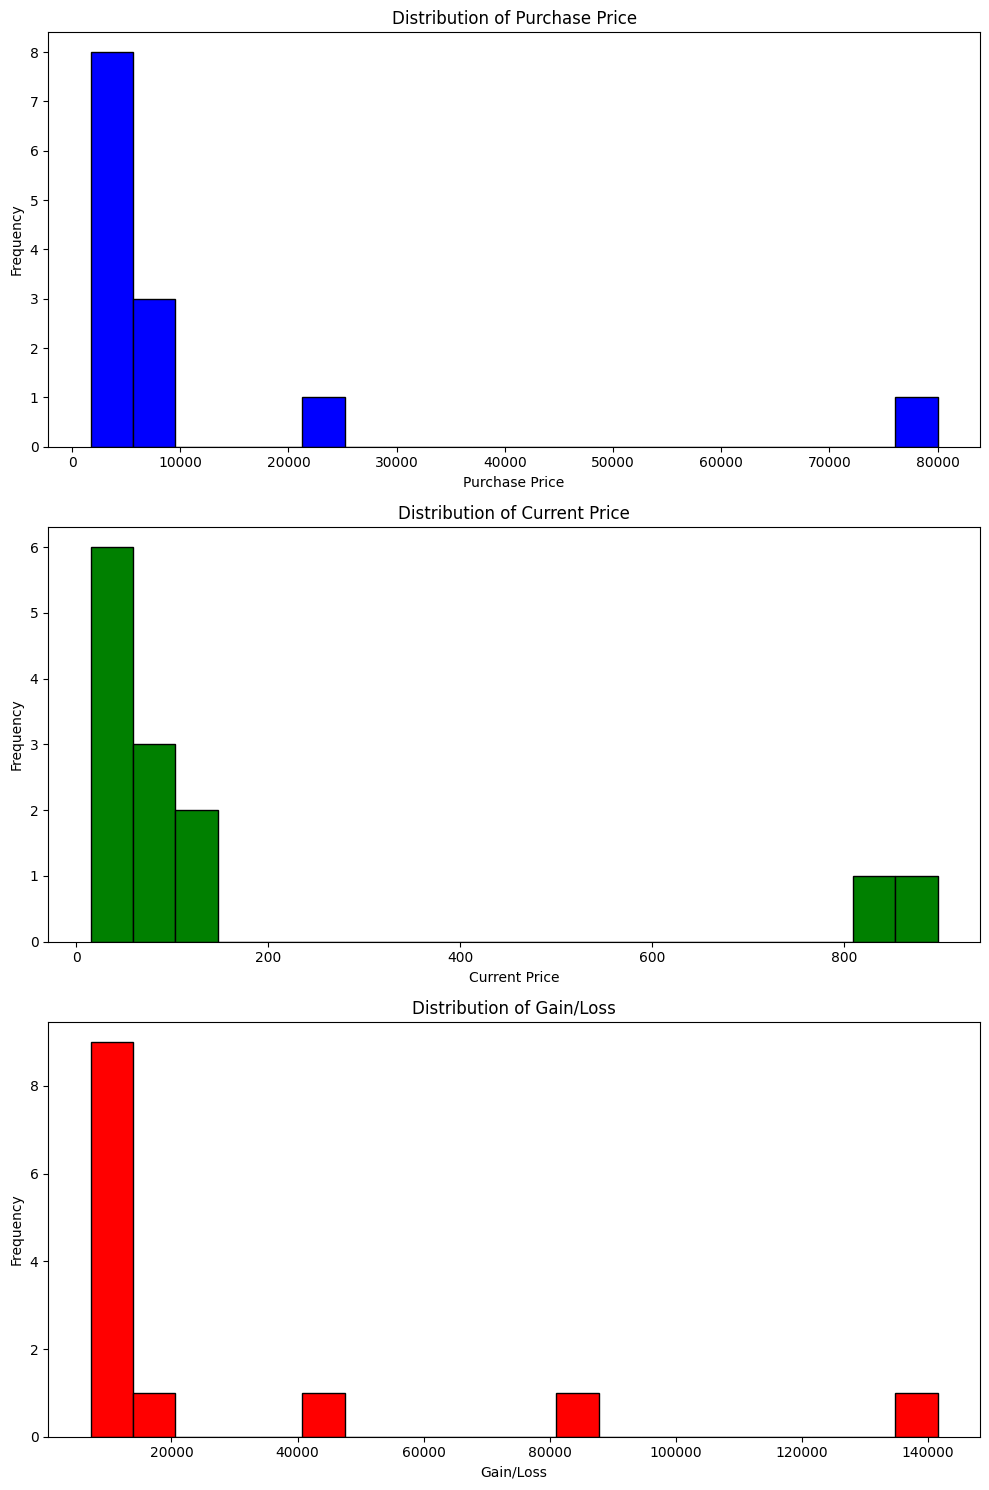

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

axes[0].hist(stock_data['Purchase Price'], bins=20, color='blue', edgecolor='black')
axes[0].set_title('Distribution of Purchase Price')
axes[0].set_xlabel('Purchase Price')
axes[0].set_ylabel('Frequency')

axes[1].hist(stock_data['Curent price'], bins=20, color='green', edgecolor='black')
axes[1].set_title('Distribution of Current Price')
axes[1].set_xlabel('Current Price')
axes[1].set_ylabel('Frequency')

axes[2].hist(stock_data['Gain/Loss'], bins=20, color='red', edgecolor='black')
axes[2].set_title('Distribution of Gain/Loss')
axes[2].set_xlabel('Gain/Loss')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# b. Atribut Stock Name dan Symbol yang memiliki Dividend/Share 5 tertinggi

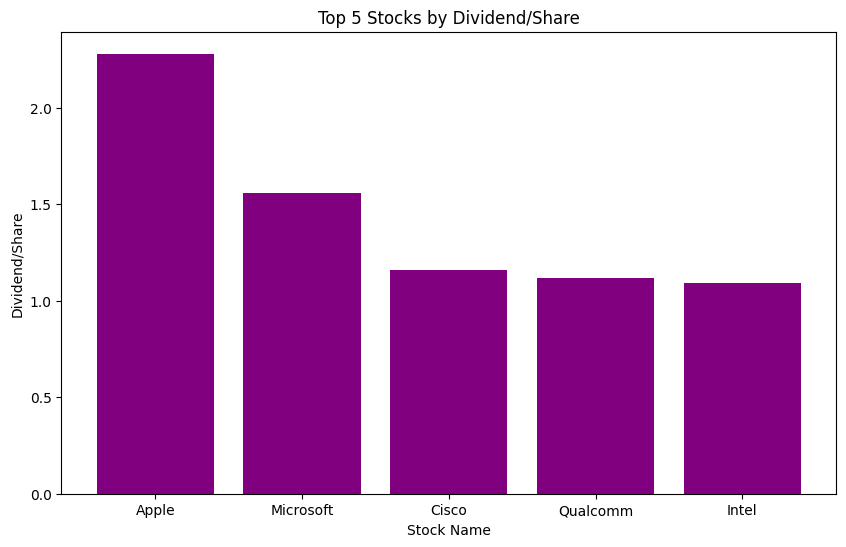

In [ ]:
top_5_dividend = stock_data.nlargest(5, 'Dividend/share')[['Stock Name', 'Symbol', 'Dividend/share']]

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_5_dividend['Stock Name'], top_5_dividend['Dividend/share'], color='purple')
plt.title('Top 5 Stocks by Dividend/Share')
plt.xlabel('Stock Name')
plt.ylabel('Dividend/Share')
plt.show()


# c. Atribut Stock Name dan Symbol yang memiliki Market Value 5 tertinggi



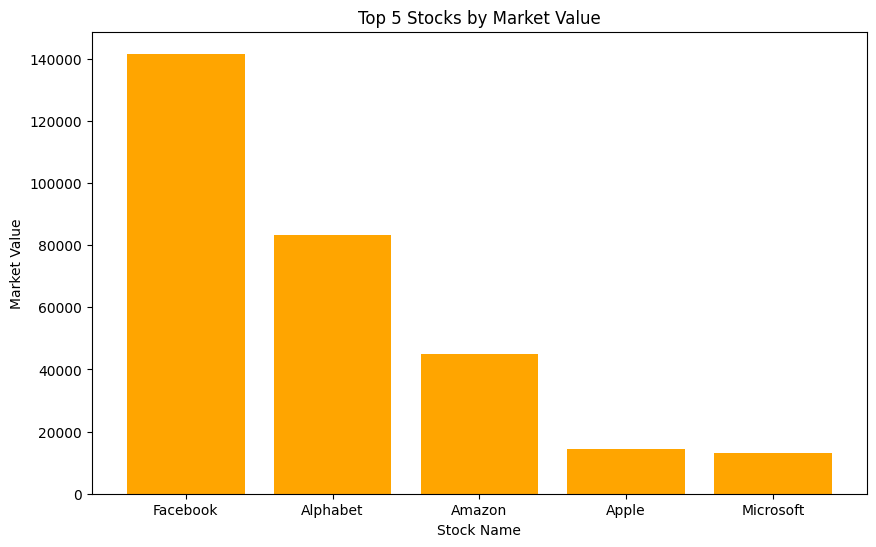

In [ ]:
top_5_market_value = stock_data.nlargest(5, 'Market Value')[['Stock Name', 'Symbol', 'Market Value']]

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_5_market_value['Stock Name'], top_5_market_value['Market Value'], color='orange')
plt.title('Top 5 Stocks by Market Value')
plt.xlabel('Stock Name')
plt.ylabel('Market Value')
plt.show()

# d. Atribut Stock Name dan Symbol yang memiliki Annual Yield 7 tertinggi

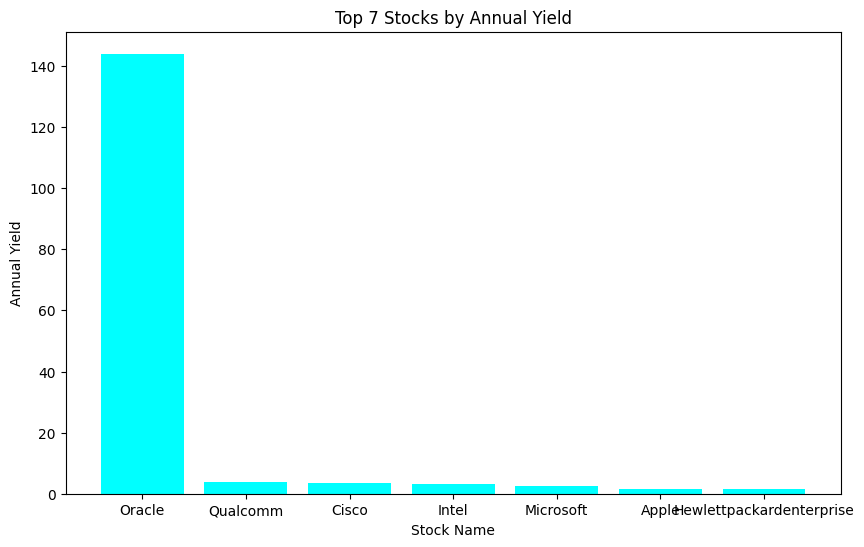

In [ ]:
top_7_yield = stock_data.nlargest(7, 'Annual Yield')[['Stock Name', 'Symbol', 'Annual Yield']]

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_7_yield['Stock Name'], top_7_yield['Annual Yield'], color='cyan')
plt.title('Top 7 Stocks by Annual Yield')
plt.xlabel('Stock Name')
plt.ylabel('Annual Yield')
plt.show()